# Acquiring Multi-Echo Data

## How to approach setting multi-echo acquisition parameters

There is no definitively optimal parameter set for multi-echo fMRI acquisition or any fMRI acqusition.
The guidelines for optimizing parameters are similar to single-echo fMRI.
An overall recommendation is to choose single-echo sequence parameters that meet the priorities of a study with regards to spatial resolution,
spatial coverage, sample rate, signal-to-noise ratio, signal drop-out, distortion, and artifacts.
Then make the least significant parameter changes needed to acquire multi-echo fMRI data.
"Least significant" is study-specific.
In one study, one might have a 1.5 sec TR with single echo
and multi-echo echo is possible with a 1.75 sec TR without impacting study goals.
In another study, slices might cover cortex and cerebellum with the largest plausible participant brains, but 10% less coverage would include full brain coverage for most participants and all key study-specific regions-of-interest.

A minimum of 3 echoes is required for methods like [tedana](https://tedana.readthedocs.io/en/stable/index.html) that fit echoes to a decay curve.
There is typically at least one echo that is earlier and one that is later
than the TE one would use for single-echo $T_2^*$ weighted fMRI.
It is also important to make sure at least 3 echoes retain a useful amount of signal.
On a 3T MRI, a few regions, particularly areas like orbitofrontal cortex, won't have sufficient signal for $TE\geq45ms$,
and there will be more noticable signal loss with $TE\geq50ms$.
There are multi-echo fMRI studies that successfully use longer 3rd echo times,
but being aware of this signal loss is important,
and one might benefit from keeping echo times shorter if one is prioritizing
acquisitions in typically high signal dropout regions.

More than 3 echoes may be useful, because that would allow for more accurate
estimates of BOLD and non-BOLD weighted fluctuations, but more echoes have an
additional time cost, which would result in either less spatiotemporal coverage
or more acceleration.
Whether the benefits of more echoes balance out the additional costs is an open research question.

Additional recommendations and guidelines for acquiring multi-echo fMRI data
are discussed in the [appendix of Dipasquale et al. (2017)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0173289)

It is also useful to look at existing publications.

- [Here is an always outdated list of multi-echo fMRI publications](https://docs.google.com/spreadsheets/d/1WERojJyxFoqcg_tndUm5Kj0H1UfUc9Ban0jFGGfPaBk/edit?gid=0#gid=0)
- [Here is an often outdated list of multi-echo fMRI open datasets](https://me-ica.github.io/open-multi-echo-data/)
that may be useful to visualize and measure data quality in datasets with similar scientific goals.

[Here is a spreadsheet that shows possible acquisition parameters on a specfic 3T scanner](https://docs.google.com/spreadsheets/d/14iM6ENHrq9TGv6GhEe2dF9IzlM26y3aR9FmZGYXzmHA/edit?usp=sharing).
This is useful to get a sense of what is possible when evaluating parameter options.
That is, one can see how much a TR will increase for 3, 4, and 5 echoes for a given
set of parameters and how different parameter changes, such as more acceleration,
will alter the echo times and the TR.
Note that this spreadsheet maps a wide range of parameter options
and that go beyond advisable options.
Just because it is possible to collect data with in-slice acceleration of 3
and multi-slice acceleration of 4
(a $\sqrt{12}$ drop in signal-to-noise ratio & more artifacts)
doesn't mean it's advisable.

Collecting and examining pilot scans is always recommended.
Look at some data collected for your specific study.
Look at signal quality, artifacts, dropout,
and if potential effects of interest are sufficiently statistically robust.

```{note}
    There are other methods and use multi-echo acqusitions.
    For example a **dual echo** method which uses a very early (~5ms)
    first echo in order to clean data. For more information on this method, see [Bright and Murphy (2013)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3518782/)
```

## Available multi-echo fMRI sequences

We have attempted to compile some basic multi-echo fMRI protocols in an [OSF project](https://osf.io/ebkrp/).
The parameter choices in these protocols run and seem reasonable,
but they have not been optimized for a specific situation.
They are a good starting point for someone designing a study,
but should not be considered canonical.
If you would like to use one of them, please customize it for your own purposes
and make sure to run pilot scans to test your choices.

### Siemens

**For Siemens users**, there are two options for Works In Progress (WIPs) Sequences.

- The Center for Magnetic Resonance Research at the University of Minnesota
  provides a custom MR sequence that allows users to collect multiple echoes
  (termed **Contrasts**).
  The sequence and documentation can be [found here](https://www.cmrr.umn.edu/multiband/).
  For details on obtaining a license follow
  [this link](http://license.umn.edu/technologies/cmrr_center-for-magnetic-resonance-research-software-for-siemens-mri-scanners).
  By default the number of contrasts is 1, yielding a single-echo sequence.
  In order to collect multiple echoes,
  increase number of Contrasts on the **Sequence Tab, Part 1** on the MR console.
- The Martinos Center at Harvard also has a MR sequence available, with the details
  [available here](https://www.nmr.mgh.harvard.edu/software/c2p/sms).
  The number of echoes can be specified on the **Sequence, Special** tab in this sequence.

### GE

GE users can request access to the HyperMEPI ATSM sequence.
Request can be made through [GE's WeConnect Portal](https://collaborate.mr.gehealthcare.com).
This sequence has both hyperband,
(GE's term for simultaneous-multislice or multiband) and multi-echo.
Depending on scanner and software version,
GE scanners have a limit on the total number of slices that can be collected during a single acquisition.
This has the potential to limit the maximum duration of a multi-echo fMRI run.

### Philips

**For Philips users**, sequences can be defined using product software.

Multi-echo EPI (ME-EPI) can be acquired using the product software and can be combined with
SENSE parallel imaging and MultiBand.
The combination with MultiBand requires a SW release >R5.1 and MultiBand functionality to be present.
No default ME-EPI are provided, but existing single-echo EPI sequences from the BOLD fMRI folder can be
modified into multi-echo sequences by increasing the number of echoes.
As a starting point to develop a 3 echo EPI protocol start by opening the default fMRI protocol and
modify the following: increase number of echoes to 3 on the Contrast tab, set SENSE = 3, MB-SENSE = 3,
set to 3mm isotropic voxels and adjust TEs to your preference.

## Other available multi-echo MRI sequences

In addition to ME-fMRI, other MR sequences benefit from acquiring multiple
echoes, including T1-weighted imaging (MEMPRAGE) and susceptibility weighted imaging.
While most of these kinds of sequences fall outside the purview of this documentation,
quantitative T2* mapping is relevant since a baseline T2* map is used in several
processing steps including optimal combination.
While the T2* map estimated directly from fMRI time series is noisy, no current
study quantifies the benefit to optimal combination or tedana denoising if a
higher quality T2* map is used.
Some benefit is likely, so, if a T2* map is independently calculated, it can be
used as an input to many functions in the tedana workflow.

```{warning}
While tedana allows the input of a T2* map from any source, and a more
accurate T2* map should lead to better results, this hasn't been
systematically evaluated yet.
```

There are many ways to calculate T2* maps, with some using multi-echo acquisitions.
We are not presenting an expansive review of this literature here,
but {cite:t}`cohen2012t2` and {cite:t}`ruuth2019comparison` are good places to start
learning more about this topic.

## Acquisition parameter recommendations

There is no empirically tested best parameter set for multi-echo fMRI acquisition.
The guidelines for optimizing parameters are similar to single-echo fMRI.
For multi-echo fMRI, the same factors that may guide priorities for single echo
fMRI sequences are also relevant.
Choose sequence parameters that meet the priorities of a study with regards to spatial resolution,
spatial coverage, sample rate, signal-to-noise ratio, signal drop-out, distortion, and artifacts.

A minimum of 3 echoes is required for running the current implementation fo TE-dependent denoising in
``tedana``.
It may be useful to have at least one echo that is earlier and one echo that is later than the
TE one would use for single-echo T2* weighted fMRI.

More than 3 echoes may be useful, because that would allow for more accurate
estimates of BOLD and non-BOLD weighted fluctuations, but more echoes have an
additional time cost, which would result in either less spatiotemporal coverage
or more acceleration.
Where the benefits of more echoes balance out the additional costs is an open research question.

We are not recommending specific parameter options at this time.
There are multiple ways to balance the slight time cost from the added echoes that have
resulted in research publications.
We suggest new multi-echo fMRI users examine the spreadsheet of publications that use
multi-echo fMRI to identify studies with similar acquisition priorities,
and use the parameters from those studies as a starting point.
More complete recommendations and guidelines are discussed in the
appendix of {cite:t}`dipasquale2017comparing`.

```{note}
In order to increase the number of contrasts ("echoes") you may need to first increase the TR, shorten the
first TE and/or enable in-plane acceleration.
For typically used parameters see the **ME-fMRI parameters** section below.
```


## Additional considerations


### Complex reconstruction

It is possible to retain phase data when reconstructing multi-echo fMRI data.
The phase data may be leveraged for a number of useful denoising and processing methods,
including NORDIC {cite:p}`vizioli2021lowering,dowdle2021nordic,dowdle2023evaluating`,
MEDIC dynamic distortion correction {cite:p}`van2023framewise`,
and improved T2* estimation {cite:p}`cohen2012t2`.

It's important to remember that retaining phase data for each echo will effectively double the
amount of data you end up with.
This can also cause problems with online reconstruction,
for example with Siemens machines running XA30.


### No-excitation-pulse noise volumes

In order to best use NORDIC,
researchers should acquire no-RF noise volumes at the end of their fMRI runs.


## ME-fMRI parameters

The following section highlights a selection of parameters collected from published papers that have
used multi-echo fMRI.
You can see the spreadsheet of publications at
[spreadsheet of publications](https://docs.google.com/spreadsheets/d/1WERojJyxFoqcg_tndUm5Kj0H1UfUc9Ban0jFGGfPaBk/edit#gid=0).

The following plots reflect the average values for studies conducted at 3 Tesla.

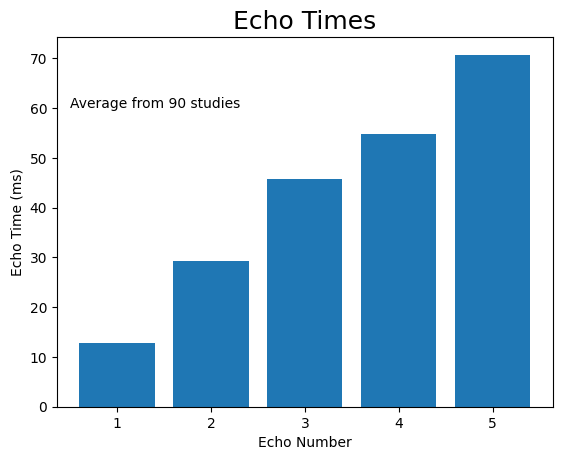

TypeError: 'value' must be an instance of str or bytes, not a float

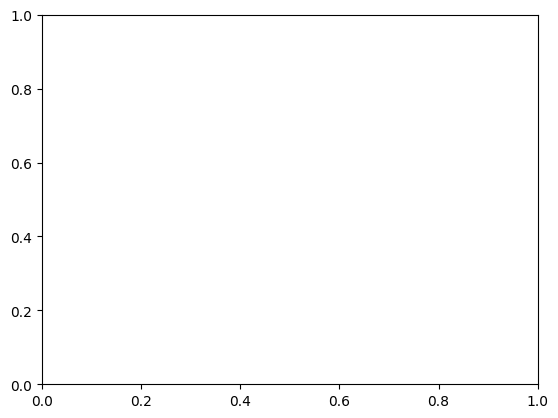

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# TODO: deal with the issue that the plot doesn't regenerate (ie isn't alive)
# Unless the code is updated.
metable = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1WERojJyxFoqcg_tndUm5Kj0H1UfUc9Ban0jFGGfPaBk/export?gid=0&format=csv",
    header=0,
)
TEs = [
    metable.TE1.mean(),
    metable.TE2.mean(),
    metable.TE3.mean(),
    metable.TE4.mean(),
    metable.TE5.mean(),
]
TE_labels = ["TE1", "TE2", "TE3", "TE4", "TE5"]
plt.bar([1, 2, 3, 4, 5], TEs)
plt.title("Echo Times", fontsize=18)
pub_count = metable.TE1.count()
plt.text(0.5, 60, "Average from {} studies".format(pub_count))
plt.xlabel("Echo Number")
plt.ylabel("Echo Time (ms)")
plt.show()

plt.hist(metable.TR.to_numpy())
plt.title("Repetition Times", fontsize=18)
plt.xlabel("Repetition Time (s)")
plt.ylabel("Count")
plt.show()

x_vox = metable.x.to_numpy()
y_vox = metable.y.to_numpy()
z_vox = metable.z.to_numpy()
plt.hist(np.nanmean([x_vox, y_vox, z_vox], 0))
plt.title("Voxel Dimensions", fontsize=18)
plt.xlabel("Average Voxel dimension (mm)")
plt.ylabel("Count")
plt.show()